In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"

In [4]:
%cd /content/gdrive/My Drive/Kaggle

/content/gdrive/My Drive/Kaggle


In [ ]:
!kaggle datasets download -d shubhamgoel27/dermnet

100% 1.72G/1.72G [01:02<00:00, 44.9MB/s]
100% 1.72G/1.72G [01:02<00:00, 29.4MB/s]


In [ ]:
!unzip \dermnet.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/Seborrheic Keratoses and other Benign Tumors/keloids-8.jpg  
  inflating: train/Seborrheic Keratoses and other Benign Tumors/keloids-80.jpg  
  inflating: train/Seborrheic Keratoses and other Benign Tumors/keloids-9.jpg  
  inflating: train/Seborrheic Keratoses and other Benign Tumors/keratoacanthoma-100.jpg  
  inflating: train/Seborrheic Keratoses and other Benign Tumors/keratoacanthoma-101.jpg  
  inflating: train/Seborrheic Keratoses and other Benign Tumors/keratoacanthoma-102.jpg  
  inflating: train/Seborrheic Keratoses and other Benign Tumors/keratoacanthoma-103.jpg  
  inflating: train/Seborrheic Keratoses and other Benign Tumors/keratoacanthoma-104.jpg  
  inflating: train/Seborrheic Keratoses and other Benign Tumors/keratoacanthoma-105.jpg  
  inflating: train/Seborrheic Keratoses and other Benign Tumors/keratoacanthoma-106.jpg  
  inflating: train/Seborrheic Keratoses and other Benign Tumors/keratoacanthom

In [5]:
from mpl_toolkits.mplot3d import Axes3D
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense, BatchNormalization
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

train_dir = '/content/gdrive/My Drive/Kaggle/train'
test_dir = '/content/gdrive/My Drive/Kaggle/test'
print(len(os.listdir(train_dir)))
print(len(os.listdir(test_dir)))

23
23


In [7]:
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=30,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
    train_dir,
    target_size=(56,56),
    class_mode='categorical',
    batch_size=230,
)

validation_generator = validation_datagen.flow_from_directory(
    test_dir,
    target_size=(56,56),
    class_mode='categorical',
    batch_size=230,
)

Found 15557 images belonging to 23 classes.
Found 4002 images belonging to 23 classes.


In [8]:
model = Sequential([
   Conv2D(128, (3, 3), activation='relu', input_shape=(56,56, 3)),
   MaxPooling2D(2, 2),
   Conv2D(128, (3, 3), activation='relu'),
   MaxPooling2D(2, 2),
   Conv2D(256, (3, 3), activation='relu', input_shape=(56,56, 3)),
   MaxPooling2D(2, 2),
   Conv2D(256, (3, 3), activation='relu'),
  #  Conv2D(128, (3, 3), activation='relu', input_shape=(112, 112, 3)),
  #  MaxPooling2D(2, 2),
  #  Conv2D(128, (3, 3), activation='relu'),
   MaxPooling2D(2, 2),
   Flatten(),
   Dense(512, activation='relu'),
   Dense(23, activation='softmax')
])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 54, 54, 128)       3584      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 27, 27, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 25, 25, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 256)       295168    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 256)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 256)         5

In [ ]:
from keras.optimizers import RMSprop,SGD,Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras import callbacks
checkpoint = ModelCheckpoint('/content/gdrive/My Drive/Kaggle/skin_disease.h5',
                             monitor='val_loss',
                             mode='min',
                             save_best_only=True,
                             verbose=1)

earlystop = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True)

reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks = [earlystop,checkpoint,reduce_lr]
# DESIRED_ACCURACY = 0.95

# class myCallback(callbacks.Callback):
#     def on_epoch_end(self, epoch, logs={}):
#         if(logs.get('accuracy')>DESIRED_ACCURACY):
#             print("\nReached 95% accuracy so cancelling training!")
#             self.model.stop_training = True

# callbacks = [earlystop,checkpoint,reduce_lr]
model.compile(
              optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history= model.fit(
                train_generator,
                epochs=100,
                callbacks=callbacks,
                validation_data=validation_generator)


Epoch 1/100
68/68 [==============================] - 5994s 88s/step - loss: 3.0069 - accuracy: 0.0892 - val_loss: 2.9082 - val_accuracy: 0.1229

Epoch 00001: val_loss improved from inf to 2.90815, saving model to /content/gdrive/My Drive/Kaggle/skin_disease.h5
Epoch 2/100
68/68 [==============================] - 487s 7s/step - loss: 2.9083 - accuracy: 0.1327 - val_loss: 2.8477 - val_accuracy: 0.1454

Epoch 00002: val_loss improved from 2.90815 to 2.84771, saving model to /content/gdrive/My Drive/Kaggle/skin_disease.h5
Epoch 3/100
68/68 [==============================] - 477s 7s/step - loss: 2.8527 - accuracy: 0.1465 - val_loss: 2.8598 - val_accuracy: 0.1502

Epoch 00003: val_loss did not improve from 2.84771
Epoch 4/100
68/68 [==============================] - 475s 7s/step - loss: 2.8216 - accuracy: 0.1630 - val_loss: 2.8061 - val_accuracy: 0.1577

Epoch 00004: val_loss improved from 2.84771 to 2.80606, saving model to /content/gdrive/My Drive/Kaggle/skin_disease.h5
Epoch 5/100
66/68 [

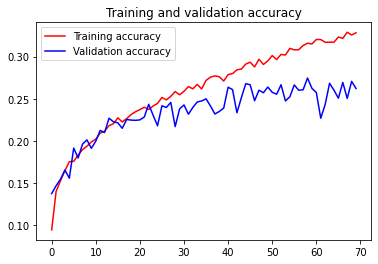

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

In [ ]:
import tensorflow as tf

new_model = tf.keras.models.load_model('/content/gdrive/MyDrive/Kaggle/skin_disease.h5')

# Show the model architecture
new_model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_32 (Conv2D)           (None, 48, 48, 64)        640       
_________________________________________________________________
batch_normalization_39 (Batc (None, 48, 48, 64)        256       
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 48, 48, 64)        36928     
_________________________________________________________________
batch_normalization_40 (Batc (None, 48, 48, 64)        256       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 24, 24, 64)        0         
_________________________________________________________________
dropout_23 (Dropout)         (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 24, 24, 128)      

In [ ]:
model.save('/content/gdrive/My Drive/Kaggle/my_model_v2.h5')

In [ ]:
import tensorflow
export_dir = '/content/gdrive/My Drive/Kaggle/v2'
tensorflow.saved_model.save(model, export_dir)


FOR DEVS: If you are overwriting _tracking_metadata in your class, this property has been used to save metadata in the SavedModel. The metadta field will be deprecated soon, so please move the metadata to a different file.
INFO:tensorflow:Assets written to: /content/gdrive/My Drive/Kaggle/v2/assets


In [ ]:
converter = tensorflow.lite.TFLiteConverter.from_saved_model(export_dir) # path to the SavedModel directory
tflite_model = converter.convert()

# Save the model.
with open('modelV2.tflite', 'wb') as f:
  f.write(tflite_model)

In [ ]:
import tensorflow.lite
mode = "Speed" 

if mode == 'Storage':
    optimization = tensorflow.lite.Optimize.OPTIMIZE_FOR_SIZE
elif mode == 'Speed':
    optimization = tensorflow.lite.Optimize.OPTIMIZE_FOR_LATENCY
else:
    optimization = tensorflow.lite.Optimize.DEFAULT

In [ ]:
converter = tensorflow.lite.TFLiteConverter.from_saved_model(export_dir)

# Set the optimzations
converter.optimizations = [optimization]

# Invoke the converter to finally generate the TFLite model
tflite_model = converter.convert()
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

In [ ]:
from keras.models import load_model
loaded_model = load_model("/content/gdrive/MyDrive/Kaggle/my_model.h5")
loaded_model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               410112    
_________________________________________________________________
dense_3 (Dense)              (None, 23)               